# The Perceptron Algorithm

In [1]:
import numpy as np
import pandas as pd
from IPython import display

pd.set_option('display.max_columns',500)

## The Perceptron Trick

One way to do optimization for a classification problem.  The focus is on linear learners.  So **classification** where the algorithm is trying to find optimal line to split the data to minimize error. To minimize error, the Perceptron trick, tries to minimize error by taking the misclassified points and moving the split line closer to misclassified point.

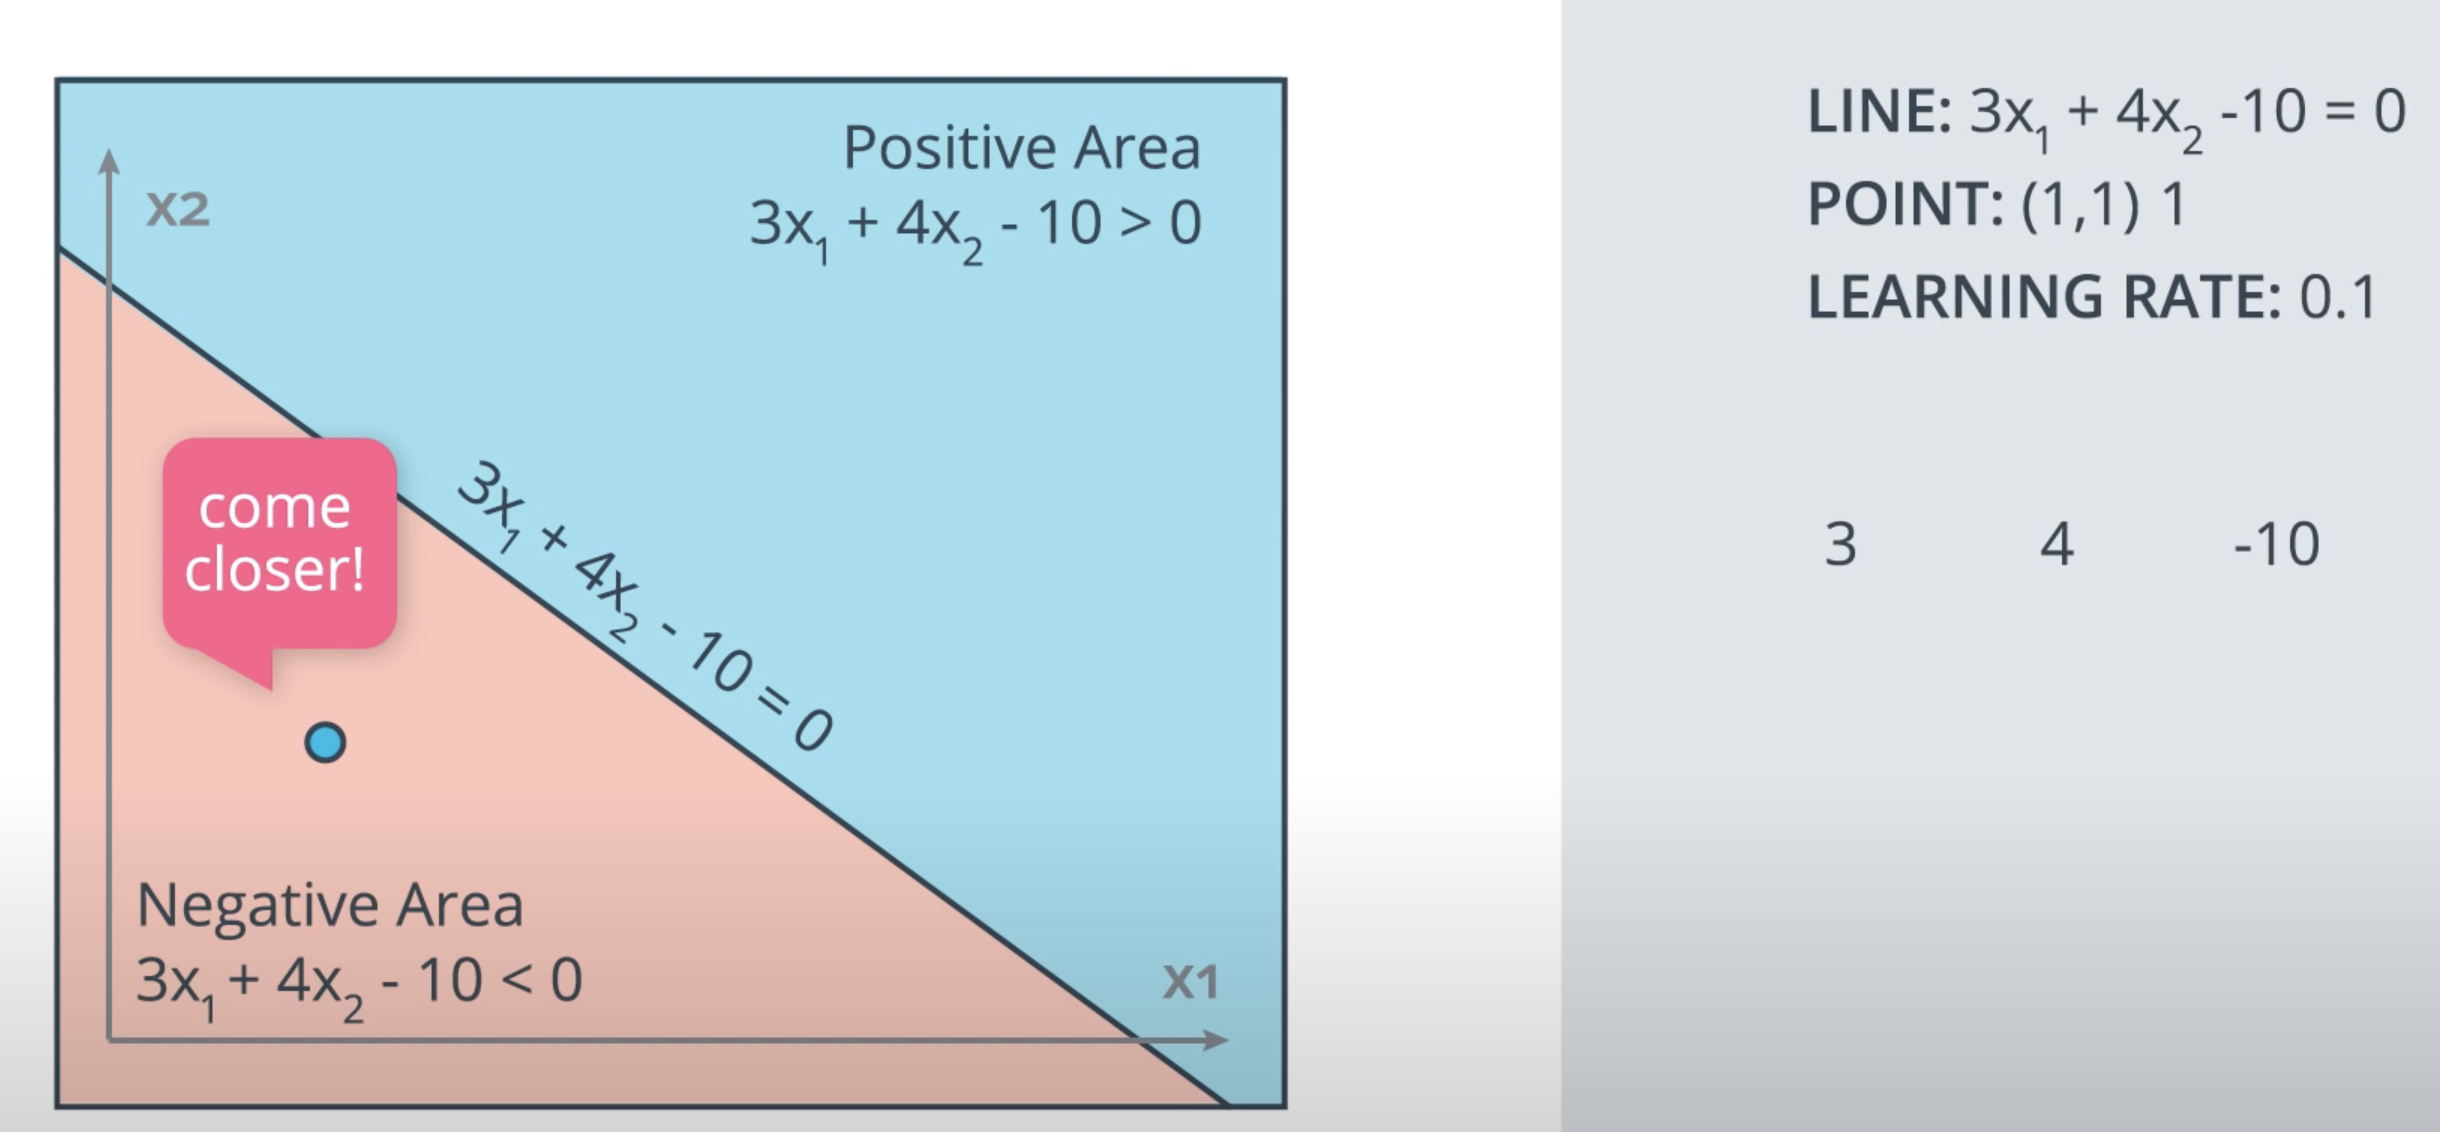

In [2]:
display.Image('./images/perception-trick-question.png')

It does this by taking the point and converting the point to a linear equations.  So if the miss classified point is (1,1).  The equation would be:

- `x1 + x2 + bias = 0`, in this case we set the bias to 1.  So the final equation is `1x1+x2+1 = 0`.
- We then multiple this equation by a learning rate (e.g., 0.1).  Because we don't want the line to drastically change, because it does classify some point well.
- So the new equation is `0.1*x1 + 0.1*x2 + .1 = 0`
- Solve the system of equations (**doing addition in the negative case (i.e., Area), we would do subtraction if the misclassfied point was in the positive area**):
    - `3.0x1 + 4.0x2 - 10 = 0` **+**
    - `0.1x1 + 0.1x2 + 0.1 = 0`
    - which equals `3.1x1 + 4.1x2 - 9.9 = 0`

Now you have new line, and you will need to check the missclassified points with this new line.  And do the same process until the change in the equation is so minimal.

## Quiz Question 4: Perceptron Trick iteration

For the second example, where the line is described by 3x1+ 4x2 - 10 = 0, if the learning rate was set to 0.1, how many times would you have to apply the perceptron trick to move the line to a position where the blue point, at (1, 1), is correctly classified?

In [3]:
bias = 1.0
learning_rate = 0.1
break_after_n_trials = 100
initial_split_equation = np.array([[3.0,4.0,-10.0]])
initial_split_equation.shape

(1, 3)

In [4]:
initial_point = np.array([[1,1,bias]])
initial_point.shape

(1, 3)

In [5]:
split_equation = initial_split_equation.copy()

In [6]:
n_trials = 0
split_theshold = 0
shift_equation = learning_rate * initial_point

ans = np.dot(split_equation, initial_point.T) # Use the transpose of the initial point
while((ans < split_theshold) | (n_trials >= break_after_n_trials)):
    split_equation = split_equation + shift_equation
    ans = np.dot(split_equation, initial_point.T) # Use the transpose of the initial point
    n_trials+=1
    print(f"Trial {n_trials}. New Split Equation: {split_equation}, Ans: {ans}")

n_trials

Trial 1. New Split Equation: [[ 3.1  4.1 -9.9]], Ans: [[-2.7]]
Trial 2. New Split Equation: [[ 3.2  4.2 -9.8]], Ans: [[-2.4]]
Trial 3. New Split Equation: [[ 3.3  4.3 -9.7]], Ans: [[-2.1]]
Trial 4. New Split Equation: [[ 3.4  4.4 -9.6]], Ans: [[-1.8]]
Trial 5. New Split Equation: [[ 3.5  4.5 -9.5]], Ans: [[-1.5]]
Trial 6. New Split Equation: [[ 3.6  4.6 -9.4]], Ans: [[-1.2]]
Trial 7. New Split Equation: [[ 3.7  4.7 -9.3]], Ans: [[-0.9]]
Trial 8. New Split Equation: [[ 3.8  4.8 -9.2]], Ans: [[-0.6]]
Trial 9. New Split Equation: [[ 3.9  4.9 -9.1]], Ans: [[-0.3]]
Trial 10. New Split Equation: [[ 4.  5. -9.]], Ans: [[-7.10542736e-15]]
Trial 11. New Split Equation: [[ 4.1  5.1 -8.9]], Ans: [[0.3]]


11

# Coding the Perceptron Algorithm

Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv).

In [ ]:
display.Image('./images/perception-algo-data-file.png')

Recall that the perceptron step works as follows. For a point with coordinates (p,q), label y (true value of the point), and prediction given by the equation $\hat{y}$ = step(w_1x_1 + w_2x_2 + b) , where $\hat{y}$ >= 0 is predicated as a positive label, else a negative label is predicted for the point.  Here are the conditions:

**$\hat{y}$ = step(w1x1 + w2x2 + b):**

- If the point is correctly classified, do nothing.
- If the point is classified positive, but it has a negative label, subtract αp, αq, and α from w1, w2, and b respectively.
- If the point is classified negative, but it has a positive label, add αp, αq and α to w1, w2, and b respectively.


Then click on `run` to graph the solution that the perceptron algorithm gives you. It'll actually draw a set of dotted lines, that show how the algorithm approaches to the best solution, given by the black solid line.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing of the initial parameters) to see how your initial conditions can affect the solution!

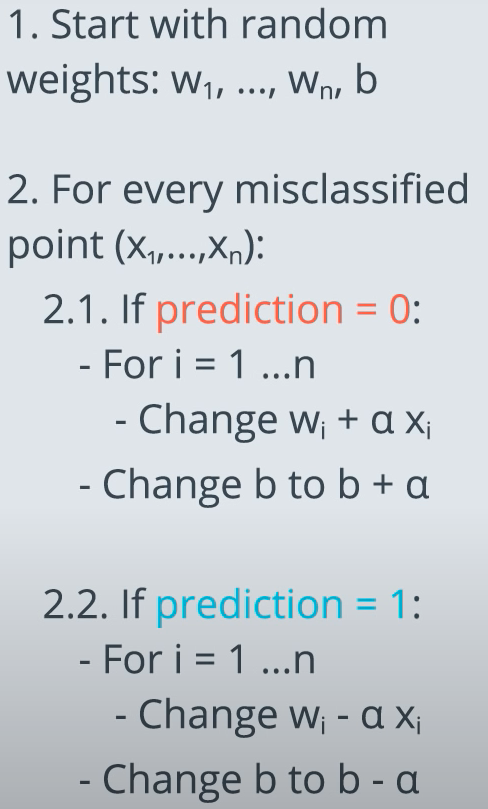

In [10]:
display.Image('./images/perceptron-algo.png', width=200, height=200)

In [ ]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# Y is the true label
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.

# Solution
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code

    # find incorrect labels using the equation
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1: # True label is 1 (positive), but perceptron classified as 0 (negative)
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1: # True label is 0 (negative), but perceptron classified as 1 (positive)
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate

    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines
